# California Housing Prices predictor

In this proyect we are aiming to predict the median house values in Californian districts, given a certain number of features from these districts.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get and Split the Data

In [3]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#sns.pairplot(data=housing)

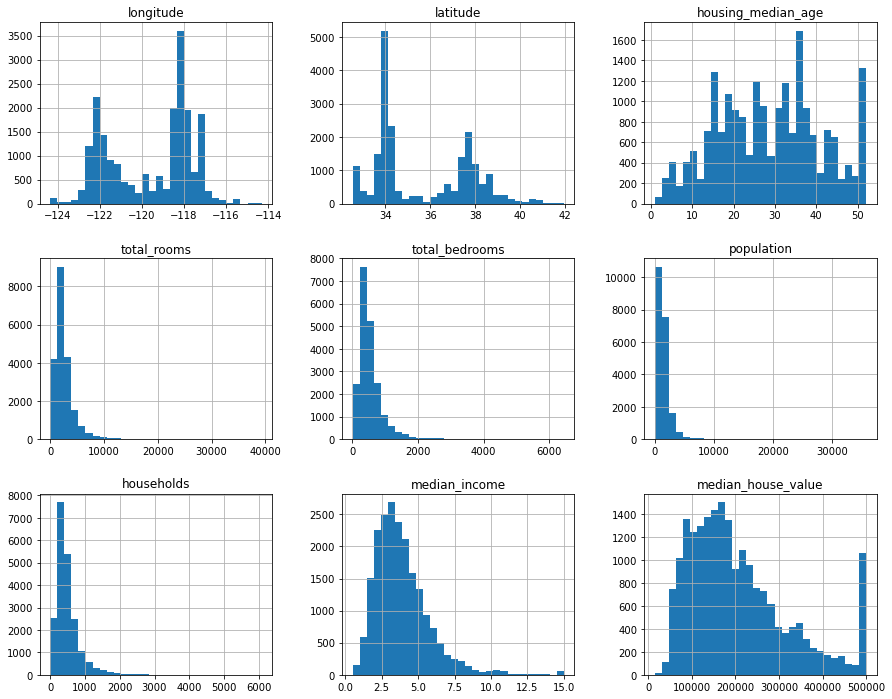

In [8]:
housing.hist(figsize=(15,12),bins=30);

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(housing.drop('median_income',axis=1), housing['median_income'], test_size=0.2, random_state=42)

<AxesSubplot:>

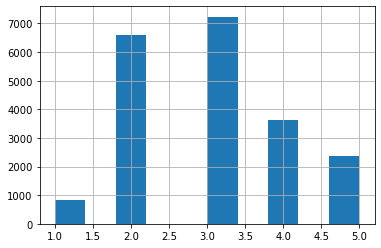

In [11]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
#pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf]).value_counts().sort_index().plot.bar()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
data_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

In [14]:
for train_index, test_index in data_split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [15]:
strat_train['income_cat'].value_counts()/len(strat_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [16]:
strat_test['income_cat'].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
strat_train.drop('income_cat',axis=1, inplace=True)
strat_test.drop('income_cat',axis=1, inplace=True)

# EDA

In [19]:
housing_tr = strat_train.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

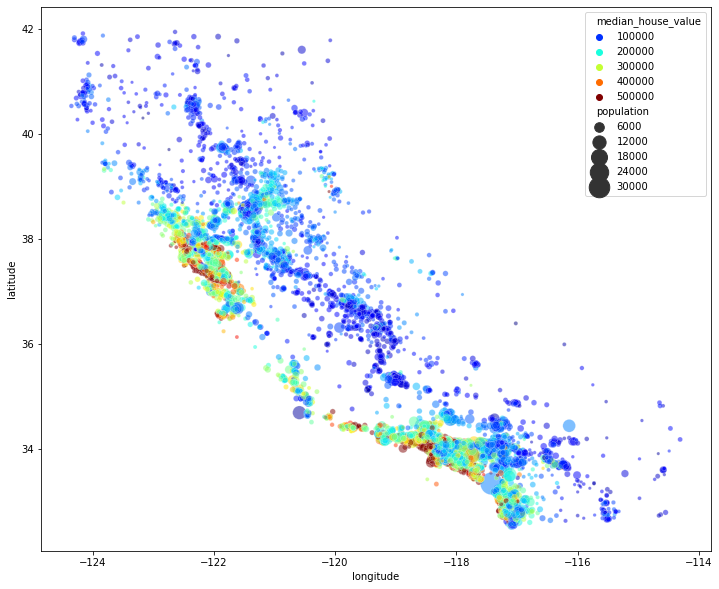

In [19]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=housing_tr, x='longitude',y='latitude',alpha=0.5,hue='median_house_value'
                ,size=housing_tr['population'],sizes=(10,500),palette=plt.get_cmap("jet"))

<AxesSubplot:>

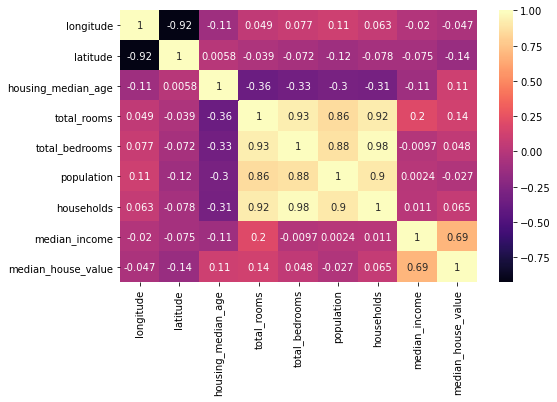

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(housing_tr.corr(),annot=True,center=0,cmap='magma')

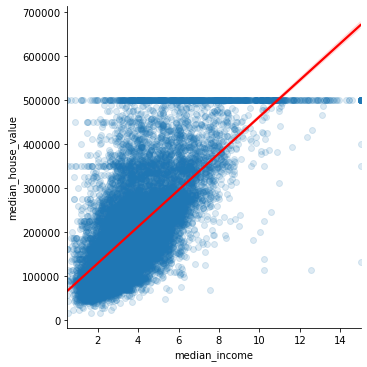

In [21]:
sns.lmplot(data=housing_tr,x='median_income',y='median_house_value'
           ,scatter_kws={'alpha':0.15},line_kws={'color':'r'})

In [22]:
housing_tr['rooms_per_household']=housing_tr['total_rooms']/housing_tr['households']
housing_tr['bedrooms_per_room']=housing_tr['total_bedrooms']/housing_tr['total_rooms']
housing_tr['population_per_household']=housing_tr['population']/housing_tr['households']

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

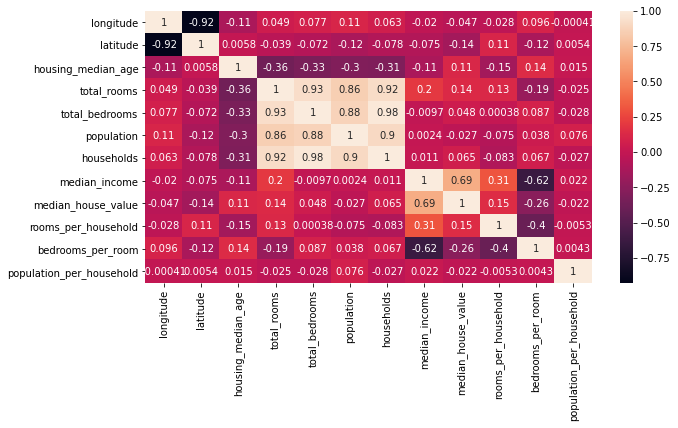

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(housing_tr.corr(),annot=True)

# Prepare the Data for ML Algorithms

In [20]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [21]:
housing_tr_labels = housing_tr['median_house_value'].copy()
housing_tr = strat_train.drop('median_house_value',axis=1)

In [22]:
#housing_tr.isnull().sum()
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


### 3.Custom Transformer 
###### (Scikit-learn relies on duck typing)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6    #<------  hardcoded <-------------------

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]  #side by side concat

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_tr.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_tr.columns)+["rooms_per_household", "population_per_household"],
    index=housing_tr.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


## PIPELINE
###### (summarize the data transformation )

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
num_pipeline = Pipeline([('myimputer',SimpleImputer(strategy='median')),
                        ('attrib_add_transf',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())])

In [48]:
from sklearn.compose import ColumnTransformer

In [34]:
num_attr = list(housing_tr.select_dtypes(include=np.number).columns)  #only numerical attributes (i.e without ocn_prox)
cat_attr = ['ocean_proximity']

In [50]:
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attr),
                                  ("cat",OneHotEncoder(),cat_attr)])

In [51]:
housing_prepared = full_pipeline.fit_transform(housing_tr)

# Select and Train a Model

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lin_reg = LinearRegression()

In [54]:
lin_reg.fit(housing_prepared,housing_tr_labels)

LinearRegression()

In [55]:
some_data = housing_tr.iloc[:5]
some_labels = housing_tr_labels.iloc[:5]

In [56]:
some_data_prep = full_pipeline.transform(some_data)

In [57]:
print(lin_reg.predict(some_data_prep))
print(list(some_labels))

[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [58]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
#lin_mse = mean_squared_error(housing_tr_labels, housing_predictions)
lin_rmse = mean_squared_error(housing_tr_labels, housing_predictions, squared=False)
lin_rmse

68628.19819848922

In [59]:
housing_tr_labels.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

<AxesSubplot:ylabel='Frequency'>

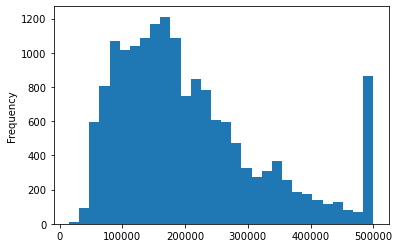

In [60]:
housing_tr_labels.plot.hist(bins=30)

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_tr_labels)

DecisionTreeRegressor()

In [63]:
housing_predictions = tree_reg.predict(housing_prepared)
#housing_mse = mean_squared_error(housing_tr_labels, housing_predictions)
housing_rmse = mean_squared_error(housing_tr_labels, housing_predictions, squared=False)
housing_rmse

0.0

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(tree_reg, housing_prepared, housing_tr_labels,scoring="neg_root_mean_squared_error",cv=10)

In [66]:
def display_score(scores):
    for i in scores:
            print(f"score:{i}")

    print(f"mean:{scores.mean()}")
    print(f"Std:{scores.std()}")

In [67]:
display_score(scores)

score:-68522.43132868028
score:-68203.16926202021
score:-71896.3644600587
score:-69037.6812237379
score:-72468.51972815469
score:-75670.81741677377
score:-69751.2883862086
score:-71229.39634206935
score:-76270.55814279245
score:-70971.44033758764
mean:-71402.16666280836
Std:2652.5832762810383


In [68]:
lin_scores = cross_val_score(LinearRegression(),housing_prepared,housing_tr_labels,scoring="neg_root_mean_squared_error",cv=10)

In [69]:
display_score(lin_scores)

score:-66782.73843989319
score:-66960.1180710006
score:-70347.95244419384
score:-74739.5705255179
score:-68031.13388937665
score:-71193.84183425657
score:-64969.63056405337
score:-68281.61137997014
score:-71552.91566557658
score:-67665.10082066945
mean:-69052.46136345083
Std:2731.674001798347


In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_tr_labels)

RandomForestRegressor(random_state=42)

In [71]:
housing_predictions = forest_reg.predict(housing_prepared)
#forest_mse = mean_squared_error(housing_tr_labels, housing_predictions)
forest_rmse = mean_squared_error(housing_tr_labels, housing_predictions, squared=False)
forest_rmse

18603.515021376355

In [72]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_tr_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
display_score(forest_scores)

score:-49519.803642334635
score:-47461.9115823026
score:-50029.02762853677
score:-52325.28068953377
score:-49308.39426421178
score:-53446.3789262215
score:-48634.80365739642
score:-47585.73832311089
score:-53490.10699751184
score:-50021.58529220072
mean:-50182.303100336096
Std:2097.0810550985693


# Fine Tune the model

## Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], "max_features": [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_tr_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [76]:
grid_search.cv_results_

{'mean_fit_time': array([0.04962821, 0.16871052, 0.5812571 , 0.08124309, 0.28165889,
        0.79593172, 0.10622354, 0.37967606, 1.21852269, 0.14019194,
        0.47196989, 1.39634829, 0.07809315, 0.25931315, 0.10563674,
        0.36591568, 0.1249814 , 0.45886292]),
 'std_fit_time': array([5.13566370e-03, 1.08383181e-02, 6.34573250e-02, 6.24631569e-03,
        2.51229013e-02, 2.48907208e-02, 6.24823156e-03, 1.92625671e-02,
        7.99261240e-02, 5.66479355e-03, 1.29126881e-02, 2.44782073e-02,
        2.67393000e-05, 7.66422378e-03, 6.11017131e-03, 2.19227969e-02,
        9.86832591e-03, 2.36847751e-02]),
 'mean_score_time': array([0.        , 0.00937371, 0.02375684, 0.01249199, 0.00651445,
        0.02500024, 0.00624924, 0.00690398, 0.03014445, 0.00432343,
        0.00846086, 0.0241354 , 0.00624957, 0.00624933, 0.00432224,
        0.0101058 , 0.00624967, 0.01049719]),
 'std_score_time': array([0.        , 0.0076536 , 0.00511936, 0.00624601, 0.00593368,
        0.00766958, 0.00765372, 

In [77]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049628,0.005136,0.000000,0.000000,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-61948.541625,-64398.046804,...,-63657.835980,1198.453319,18,-32620.748658,-33243.678031,-33414.818178,-33351.790958,-33610.260081,-33248.259181,335.647381
1,0.168711,0.010838,0.009374,0.007654,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-55206.619221,-57051.388196,...,-55614.118741,1201.673811,11,-24345.789489,-24230.047986,-24035.316653,-23908.851253,-24088.381579,-24121.677392,152.205237
2,0.581257,0.063457,0.023757,0.005119,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-51857.352352,-54964.403236,...,-53362.550065,1533.250936,9,-20931.049976,-20955.361611,-20908.614389,-20921.173353,-21101.313275,-20963.502521,70.591376
3,0.081243,0.006246,0.012492,0.006246,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-61075.204945,-61537.676980,...,-60950.968080,1351.519241,16,-31408.856364,-31820.827114,-30281.059115,-32208.701211,-31157.245249,-31375.337811,654.077824
4,0.281659,0.025123,0.006514,0.005934,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-51636.066280,-52768.469150,...,-52727.320869,1203.194559,8,-22576.790913,-22721.840639,-22277.551134,-23315.642705,-22716.287984,-22721.622675,337.953865
5,0.795932,0.024891,0.025000,0.007670,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-48858.500199,-50876.795349,...,-50362.870870,1210.013926,3,-19592.945622,-19698.395649,-19470.147998,-20102.132573,-19609.996214,-19694.723611,216.317934
6,0.106224,0.006248,0.006249,0.007654,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-55853.891416,-59885.883923,...,-58641.247425,1631.502442,14,-30406.155996,-29810.969872,-30582.895259,-30016.330533,-29367.777719,-30036.825876,432.123348
7,0.379676,0.019263,0.006904,0.006079,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-50494.192264,-52745.039212,...,-51986.899294,1416.689339,6,-22316.683665,-22463.012075,-22348.744804,-22339.035999,-22484.533400,-22390.401988,69.197000
8,1.218523,0.079926,0.030144,0.004826,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-48682.745779,-50829.499948,...,-50130.000592,1286.729843,2,-19592.186769,-19505.668577,-19506.968718,-19636.941183,-19753.270218,-19599.007093,92.158304
9,0.140192,0.005665,0.004323,0.005807,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-57909.442539,-57866.672879,...,-57859.172814,1080.063204,13,-30377.826011,-29245.565999,-29331.418056,-29802.623790,-30251.094367,-29801.705644,461.373485


In [78]:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
    print((-mean_score), params)

63657.835980118 {'max_features': 2, 'n_estimators': 3}
55614.11874067824 {'max_features': 2, 'n_estimators': 10}
53362.55006487941 {'max_features': 2, 'n_estimators': 30}
60950.96808046017 {'max_features': 4, 'n_estimators': 3}
52727.32086920469 {'max_features': 4, 'n_estimators': 10}
50362.87086954546 {'max_features': 4, 'n_estimators': 30}
58641.24742505832 {'max_features': 6, 'n_estimators': 3}
51986.89929404722 {'max_features': 6, 'n_estimators': 10}
50130.00059243755 {'max_features': 6, 'n_estimators': 30}
57859.17281358604 {'max_features': 8, 'n_estimators': 3}
51693.40137818176 {'max_features': 8, 'n_estimators': 10}
49670.02728175415 {'max_features': 8, 'n_estimators': 30}
62876.71678063231 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54639.83419201318 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59466.78779629106 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52721.587849949996 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

## Fetaure importance according to the best model (random forest)

In [79]:
grid_search.best_estimator_.feature_importances_

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [80]:
extra_attr = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
attr_1hotcat = list(full_pipeline.named_transformers_['cat'].categories_[0])
tot_attr = num_attr+extra_attr+attr_1hotcat

In [81]:
sorted(list(zip(grid_search.best_estimator_.feature_importances_,tot_attr)))[::-1]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

# Evaluation on Test Set

In [82]:
final_model = grid_search.best_estimator_

In [83]:
final_model

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [84]:
X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

In [85]:
X_test_prepared = full_pipeline.transform(X_test)

In [86]:
X_test_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND
...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND


In [91]:
X_test_prepared

array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [92]:
final_prediction = final_model.predict(X_test_prepared)

In [94]:
mean_squared_error(y_test, final_prediction, squared=False)

47730.22690385927

### 95% confidence interval for test RMSE

In [95]:
from scipy import stats

In [96]:
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)
                        ))

array([45685.10470776, 49691.25001878])